<div align="center">
    <img src="../assets/dataset-cover.png" />
    <h1><b>16 Personalities | 2. ANN Modeling and evaluation</b></h1>
    <hr />
</div>

In [28]:
import pandas as pd

df = pd.read_csv('../data/respondent_data.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Q1           59999 non-null  int64
 1   Q2           59999 non-null  int64
 2   Q3           59999 non-null  int64
 3   Q4           59999 non-null  int64
 4   Q5           59999 non-null  int64
 5   Q6           59999 non-null  int64
 6   Q7           59999 non-null  int64
 7   Q8           59999 non-null  int64
 8   Q9           59999 non-null  int64
 9   Q10          59999 non-null  int64
 10  Q11          59999 non-null  int64
 11  Q12          59999 non-null  int64
 12  Q13          59999 non-null  int64
 13  Q14          59999 non-null  int64
 14  Q15          59999 non-null  int64
 15  Q16          59999 non-null  int64
 16  Q17          59999 non-null  int64
 17  Q18          59999 non-null  int64
 18  Q19          59999 non-null  int64
 19  Q20          59999 non-null  int64
 20  Q21   

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,11
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,13
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,7
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,12
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,3


## **2.1 Splitting the data**

<hr />

In [29]:
X = df.drop('Personality', axis=1)
y = df['Personality']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **2.2 Modeling**

<hr />

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.regularizers import l2

model = Sequential()

# Input + First Hidden Layer
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)))

# Hidden Layers
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))

# Output Layer (Number of personalities)
model.add(Dense(16, activation='softmax'))

# Compile with categorical_crossentropy loss for classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               7808      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
Total params: 18,672
Trainable params: 18,672
Non-trainable params: 0
_________________________________________________________________


### **2.2.1 Training model**

<hr />

In [32]:
from keras import callbacks

# Add a early stop for when the validation loss becomes bigger than the training loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5484 - accuracy: 0.9206 - val_loss: 0.3475 - val_accuracy: 0.9714
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3027 - accuracy: 0.9785 - val_loss: 0.2880 - val_accuracy: 0.9772
Epoch 3/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2608 - accuracy: 0.9809 - val_loss: 0.2605 - val_accuracy: 0.9790
Epoch 4/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2381 - accuracy: 0.9821 - val_loss: 0.2388 - val_accuracy: 0.9809
Epoch 5/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2246 - accuracy: 0.9832 - val_loss: 0.2345 - val_accuracy: 0.9797
Epoch 6/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2160 - accuracy: 0.9825 - val_loss: 0.2279 - val_accuracy: 0.9794
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2084 - accuracy: 0.9837 - val_loss: 0.2167 - val_accuracy:

### **2.2.2 Model evaluation**

<hr />

In [38]:
accuracy = model.evaluate(X_test, y_test)[1]

print(f'Accuracy: {accuracy:.4f}')

375/375 [==============================] - 1s 2ms/step - loss: 0.1890 - accuracy: 0.9827
Accuracy: 0.9827


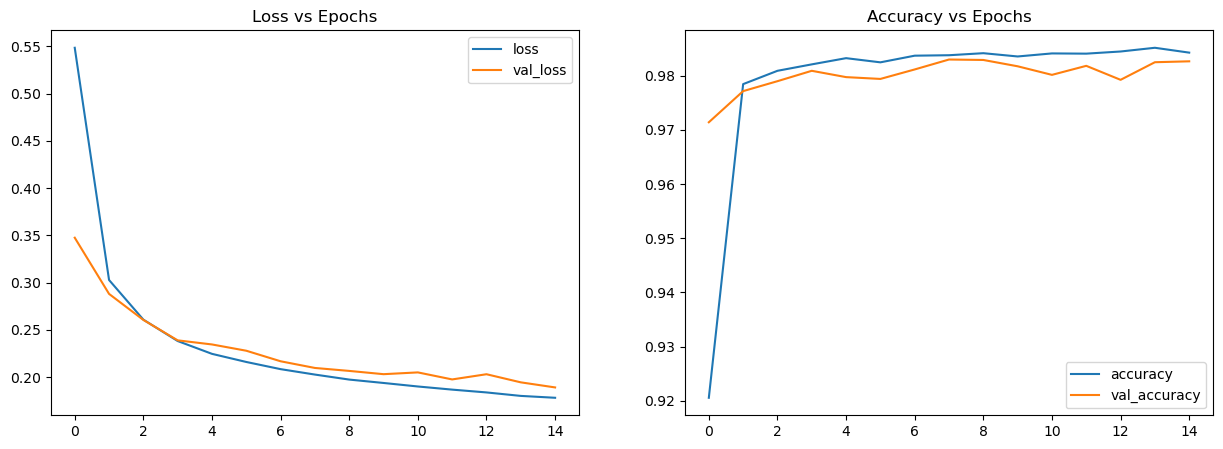

In [35]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the loss vs epochs
ax[0].plot(history.history['loss'], label='loss')
ax[0].plot(history.history['val_loss'], label='val_loss')
ax[0].legend()
ax[0].set_title('Loss vs Epochs')

# Plot the accuracy vs epochs
ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()
ax[1].set_title('Accuracy vs Epochs')

plt.show()

375/375 [==============================] - 1s 3ms/step


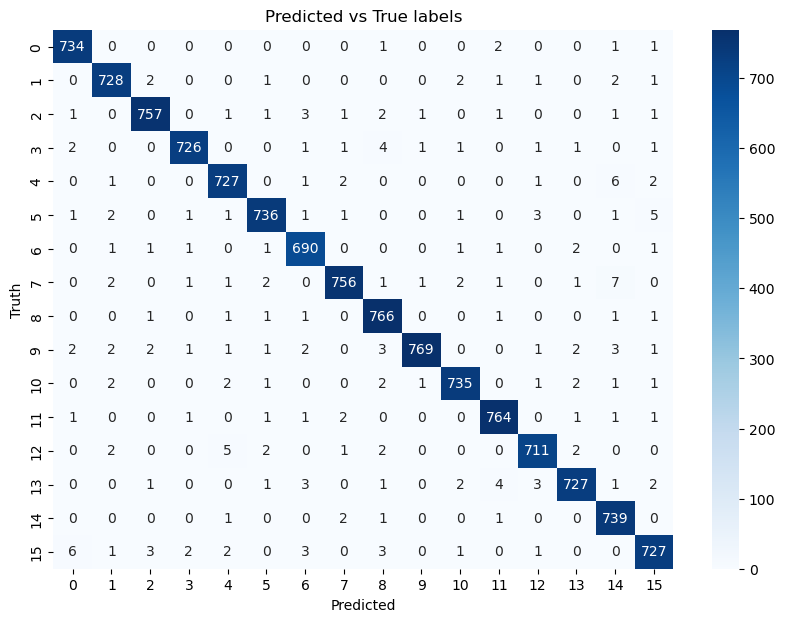

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = [list(i).index(max(i)) for i in y_pred]

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.title('Predicted vs True labels')
plt.show()

> *00 The Supervisor*  
> *01 The Commander*  
> *02 The Provider*  
> *03 The Giver*  
> *04 The Inspector*  
> *05 The Nurturer*  
> *06 The Mastermind*  
> *07 The Counselor*  
> *08 The Doer*  
> *09 The Performer*   
> *10 The Visionary*  
> *11 The Champion*  
> *12 The Craftsman*  
> *13 The Composer*  
> *14 The Thinker*  
> *15 The Idealist*  

### **2.2.3 Saving the model**
<hr />

In [37]:
model.save('../models/personality_prediction_ann.h5')
print('Model saved to ../models/personality_prediction_ann.h5')

Model saved to ../models/personality_prediction_ann.h5
